# Batch Normalization

Ao longo do treinamento de uma MLP, os neurônios internos da rede enfrentam uma grande dificuldade em sua aprendizagem: o deslocamento da covariância interna (internal covariate shift). De forma intuitiva, o internal covariate shift ocorre pois o input de um neurônio depende daqueles que o precede, de forma que, enquanto a rede aprende, a distribuição da entrada de um neurônio interno também muda. Dessa forma, a cada iteração de treino, o neurônio é forçado a tentar corrigir seus pesos para se adaptar às mudanças em sua entrada, tornando mais difícil que ele aprenda features significativas.

## O que é Batch Normalization

O batch normalization é uma técnica amplamente difundida no treinamento de redes neurais profundas que tem como principal objetivo solucionar o problema do internal covariate shift. A ideia por trás dele é simples: se a mudança da distribuição da entrada de um neurônio é um problema, não seria vantajoso eu garantir que essa distribuição fosse sempre a mesma? Para isso, propõe-se fazer uma z-normalização após cada camada do modelo, de forma a garantir que, mesmo enquanto os parâmetros aprendidos mudem, a entrada dos neurônios subsequentes não seja drasticamente alterada.

Essa normalização, no entanto, pode restringir a expressividade da rede. Imagine por exemplo uma ativação sigmóide. Após a normalização, os valores estariam majoritariamente próximos ao 0, que corresponde justamente à seção quasi-linear da função, limitando assim sua não-linearidade. Para resolver esse problema, o batch normalization propõe também o uso de dois parâmetros aprendíveis, que permitem que os dados sejam deslocaods e escalados.

> Paper original: https://arxiv.org/abs/1502.03167
>
> No pytorch, temos três implementações, que variam com a dimensionalidade dos dados:
> - [BatchNorm1d](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html)
> - [BatchNorm2d](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html)
> - [BatchNorm3d](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm3d.html)

### Formulação Matemática

Dado um mini-batch de ativações $x = \{x_1, x_2, \dots, x_B\}$ com $B$ exemplos:
1. Calcule a média e a variância:
   $$
   \mu_B = \frac{1}{B} \sum_{i=1}^B x_i, \quad \sigma_B^2 = \frac{1}{B} \sum_{i=1}^B (x_i - \mu_B)^2
   $$
2. Normalize as ativações:
   $$
   \hat{x}_i = \frac{x_i - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}}
   $$
   onde $\epsilon$ é uma constante pequena para evitar divisão por zero.

3. Ajuste os valores normalizados com parâmetros aprendíveis:
   $$
   y_i = \gamma \hat{x}_i + \beta
   $$
   Aqui, $\gamma$ (escala) e $\beta$ (deslocamento) são parâmetros que o modelo aprende durante o treinamento.

---

## Benefícios do Batch Normalization

1. Aceleração do Treinamento
   - BatchNorm estabiliza as ativações, o que acelera a convergência. Essa estabilidade também permite-nos aumentar o learning rate, o que acelera mais ainda a convergência.

2. Melhora no Fluxo de Gradientes:
   - Ao normalizar as ativações, o BatchNorm reduz problemas como *exploding gradient* ou *vanishing gradient*, tornando o treinamento mais estável.

3. Regularização Implícita:
   - A normalização em mini-batches introduz um leve ruído estocástico que atua como uma forma de regularização, reduzindo o risco de *overfitting*.

4. Redução da Sensibilidade à Inicialização:
   - BatchNorm diminui a dependência de inicializações precisas de pesos, tornando o treinamento menos propenso a falhas.

5. Desempenho Melhorado em Redes Profundas:
   - Em arquiteturas profundas, ele mitiga o problema do deslocamento covariante interno, tornando o aprendizado mais eficiente.

---

## Quando Usar BatchNorm?

- Deve-se usar:
  - Em redes profundas com muitas camadas, como CNNs e MLPs grandes, onde o deslocamento covariante interno pode ser um problema.
  - Quando o treinamento é instável ou lento.
  - Em tarefas complexas, onde a regularização implícita e a aceleração podem ser úteis.

- Evite usar:
  - Redes com batches muito pequenos: O BatchNorm depende de estatísticas de mini-batches; com batches pequenos, essas estatísticas podem ser muito ruidosas.
  - Modelos simples ou dados pequenos: O efeito de regularização pode ser desnecessário ou até prejudicial.
  - Redes que processam sequências (como RNNs): Nessas redes, técnicas como LayerNorm ou GroupNorm são geralmente mais eficazes.

## Alternativas ao Batch Normalization

Embora o Batch Normalization seja amplamente utilizado, ele pode não ser ideal em todos os cenários, como em redes que processam sequências ou quando os mini-batches são muito pequenos. Aqui estão algumas alternativas, com uma explicação breve sobre cada uma e links para a documentação oficial do PyTorch:

1. **Layer Normalization**:
   - Normaliza os neurônios de cada exemplo individualmente, ao invés de usar mini-batches, tornando-a adequada para modelos sequenciais como RNNs.
   - [Documentação do PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.LayerNorm.html)

2. **Group Normalization**:
   - Divide os canais em grupos e normaliza dentro de cada grupo. É útil para tarefas de visão computacional e não depende do tamanho do mini-batch.
   - [Documentação do PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.GroupNorm.html)

3. **Instance Normalization**:
   - Normaliza cada canal individualmente para cada exemplo. Comumente usada em redes para geração de imagens, como em modelos GANs.
   - [Documentação do PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.InstanceNorm1d.html)

4. **Weight Normalization**:
   - Reparametriza os pesos das camadas, separando magnitude e direção, para estabilizar o treinamento. Não utiliza estatísticas do batch.
   - [Documentação do PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.utils.weight_norm.html)

5. **Layer Scaling (Sem Normalização)**:
   - Utiliza escalas aprendíveis para ajustar as ativações sem normalizá-las explicitamente. Um exemplo seria o uso de camadas `Scale` em arquiteturas modernas como Transformers.

Essas alternativas podem ser mais apropriadas dependendo do tipo de rede e do tamanho do dataset. É importante avaliar o contexto e a tarefa ao escolher a normalização mais adequada.


---

## Resumo

Batch Normalization é uma ferramenta poderosa para estabilizar e acelerar o treinamento de redes neurais profundas. Ele atua normalizando as ativações de cada mini-batch, reduzindo o deslocamento covariante interno e permitindo um aprendizado mais eficiente. Apesar de seus benefícios, ele não é universal e pode não ser adequado para todas as arquiteturas ou condições de treinamento.

Neste notebook, veremos um exemplo prático que demonstra o impacto do BatchNorm em uma tarefa de classificação (mais ou menos) complexa.


## Exemplo de uso

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_classification
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
# Gerar dados de classificação difíceis com várias classes
n_samples = 100000
n_features = 50
n_classes = 5
n_informative = 25
n_clusters_per_class = 6

X, y = make_classification(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=n_informative,
    n_redundant=5,
    n_classes=n_classes,
    n_clusters_per_class=n_clusters_per_class,
    random_state=42,
    flip_y = 0.15,
    class_sep = 0.7,
    shift = None,
    scale = None
)

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Converter para tensores
X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
y_tensor = torch.tensor(y, dtype=torch.long).to(device)
dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=512, shuffle=True)

In [4]:
class DeepMLPWithoutBatchNorm(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(n_features, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, n_classes)
        )

    def forward(self, x):
        return self.layers(x)

In [5]:
class DeepMLPWithBatchNorm(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(n_features, 256),
            nn.BatchNorm1d(256), # O BatchNorm deve ser colocado depois da camada linear e antes da ativação
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, n_classes)
        )

    def forward(self, x):
        return self.layers(x)

In [6]:
def train_model(model, dataloader, epochs=50, lr = 1e-4):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    losses = []

    for epoch in tqdm(range(epochs), desc="Treinando o modelo"):
        epoch_loss = 0
        for inputs, targets in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        losses.append(epoch_loss / len(dataloader))

    return losses

Abaixo fazemos o treinamento com um learning rate baixo. Repare que o BatchNorm acelera a convergência da rede.

Treinando o modelo: 100%|██████████| 50/50 [01:00<00:00,  1.21s/it]


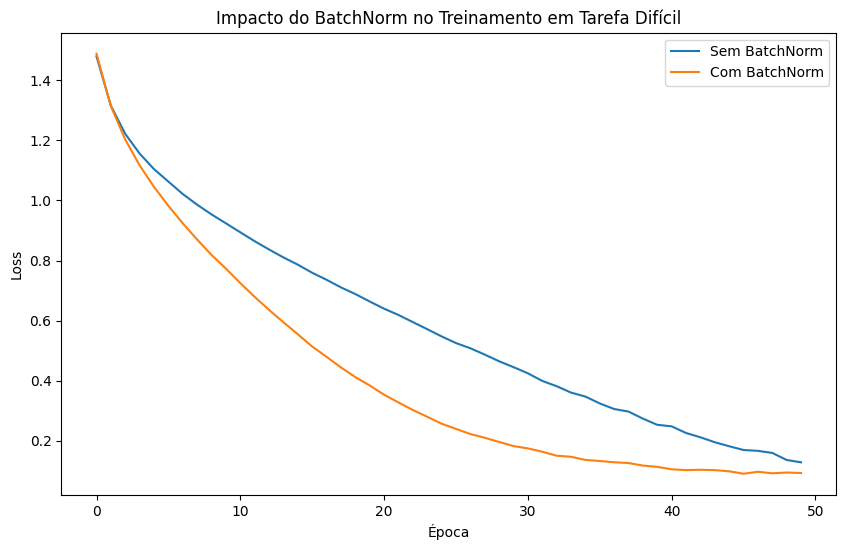

In [7]:
model_without_bn = DeepMLPWithoutBatchNorm().to(device)
model_with_bn = DeepMLPWithBatchNorm().to(device)

losses_without_bn = train_model(model_without_bn, dataloader)
losses_with_bn = train_model(model_with_bn, dataloader)

# Visualizar as perdas durante o treinamento
plt.figure(figsize=(10, 6))
plt.plot(losses_without_bn, label="Sem BatchNorm")
plt.plot(losses_with_bn, label="Com BatchNorm")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Impacto do BatchNorm no Treinamento em Tarefa Difícil")
plt.legend()
plt.show()


Aqui aumentamos o learning rate, repare que o batch norm torna o treinamento mais estável

Treinando o modelo: 100%|██████████| 50/50 [01:00<00:00,  1.20s/it]


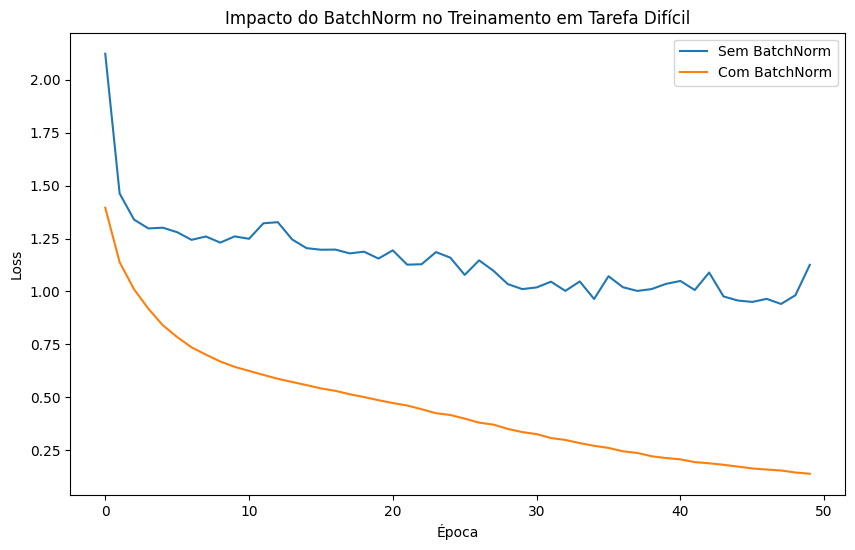

In [8]:
model_without_bn = DeepMLPWithoutBatchNorm().to(device)
model_with_bn = DeepMLPWithBatchNorm().to(device)

losses_without_bn = train_model(model_without_bn, dataloader, lr = 0.01)
losses_with_bn = train_model(model_with_bn, dataloader, lr = 0.01)

# Visualizar as perdas durante o treinamento
plt.figure(figsize=(10, 6))
plt.plot(losses_without_bn, label="Sem BatchNorm")
plt.plot(losses_with_bn, label="Com BatchNorm")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Impacto do BatchNorm no Treinamento em Tarefa Difícil")
plt.legend()
plt.show()